In [5]:
from pypylon import pylon

camera = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateFirstDevice())

camera.Open()

# demonstrate some feature access
new_width = camera.Width.Value - camera.Width.Inc
if new_width >= camera.Width.Min:
    camera.Width.Value = new_width

numberOfImagesToGrab = 1
camera.StartGrabbingMax(numberOfImagesToGrab)

while camera.IsGrabbing():
    grabResult = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)

    if grabResult.GrabSucceeded():
        # Access the image data.
        print("SizeX: ", grabResult.Width)
        print("SizeY: ", grabResult.Height)
        img = grabResult.Array
        print("Gray value of first pixel: ", img[0, 0])

    grabResult.Release()
camera.Close()

SizeX:  1276
SizeY:  960
Gray value of first pixel:  0


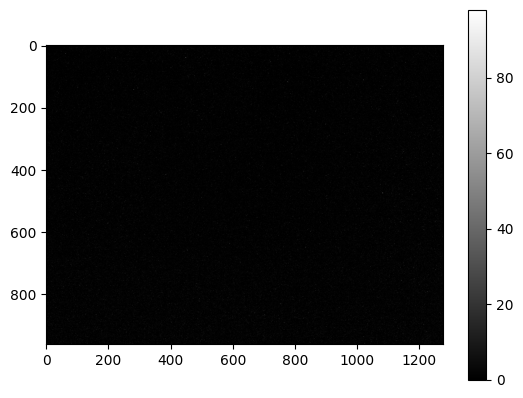

In [6]:
from matplotlib import pyplot as plt
#plt.figure(figsize = (15,15))
plt.imshow(img,cmap="grey")
plt.colorbar()
plt.show()

# This Could help identify the SN of your Camera

In [11]:
from pypylon import pylon

# Create an instance of the transport layer factory
tl_factory = pylon.TlFactory.GetInstance()

# Get all attached devices
devices = tl_factory.EnumerateDevices()

# Check if any devices were found
if not devices:
    print("No devices found.")
else:
    print(f"{len(devices)} device(s) found:")
    for i, device in enumerate(devices):
        print(f"Device {i}:")
        print(f"  Friendly Name: {device.GetFriendlyName()}")
        print(f"  Full Name: {device.GetFullName()}")
        print(f"  Serial Number: {device.GetSerialNumber()}")


1 device(s) found:
Device 0:
  Friendly Name: Basler daA1280-54um (25087060)
  Full Name: \\?\usb#vid_2676&pid_ba03&mi_00#6&1a8dd43&0&0000#{79bfeeca-947f-11e1-bc58-001b2163ef96}
  Serial Number: 25087060


In [4]:
from pypylon import pylon

# Target serial number
target_sn = "25087060"

# Get instance of the transport layer factory
tl_factory = pylon.TlFactory.GetInstance()

# Enumerate connected devices
devices = tl_factory.EnumerateDevices()

# Find device with matching serial number
camera_device = None
for device in devices:
    if device.GetSerialNumber() == target_sn:
        camera_device = device
        break

# Connect to the camera
if camera_device:
    camera = pylon.InstantCamera(tl_factory.CreateDevice(camera_device))
    camera.Open()
    print(f"Connected to camera: {camera.GetDeviceInfo().GetModelName()} (SN: {target_sn})")
    
    # Optionally: grab one image to confirm it's working
    camera.StartGrabbingMax(1)
    converter = pylon.ImageFormatConverter()
    converter.OutputPixelFormat = pylon.PixelType_RGB8packed
    converter.OutputBitAlignment = pylon.OutputBitAlignment_MsbAligned

    while camera.IsGrabbing():
        grab_result = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)
        if grab_result.GrabSucceeded():
            image = converter.Convert(grab_result)
            print(f"Grabbed image of size: {image.GetWidth()} x {image.GetHeight()}")
            img = grab_result.Array
        else:
            print("Error: ", grab_result.ErrorCode, grab_result.ErrorDescription)
        grab_result.Release()

    camera.StopGrabbing()
    camera.Close()
else:
    print(f"No camera with serial number {target_sn} found.")


Connected to camera: daA1280-54um (SN: 25087060)
Grabbed image of size: 1276 x 960


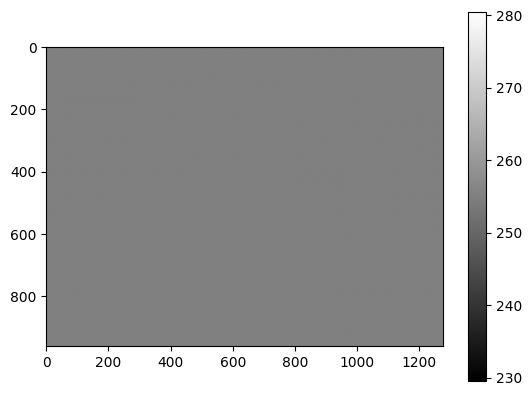

In [5]:
from matplotlib import pyplot as plt
#plt.figure(figsize = (15,15))
plt.imshow(img,cmap="grey")
plt.colorbar()
plt.show()